## 08/17 Question

Suppose you're analyzing the utilization of a small parking lot you invested in. Customers enter the automated lot, receive a ticket, and select one of 20 spots at random (e.g. they are not assigned). Upon leaving, customers pay in relation to their time in the lot.

 
    
You have collected the following dataset, which shows spot utilization for a month. Each # in the dataset corresponds to a spot # (1-20) and the # of times it appears in a row corresponds to the frequency of how many customers parked in that spot.


    
Using all of this information, write code to visualize the  Probability Mass Function (PMF) of your customers' spot selections. Your resultant chart should show each spot # (1-20) along with the probability of that spot being chosen based on your dataset. You can ignore seasonality and assume this month represents a standard month of parking at your lot.

### Approach

To solve this problem I will:
- read in the data
- determine the total number of cars parked in this month, by finding the length of the dataset
- use pandas to count the number of times each spot was parked in and turn this into a dataframe for further use
- create a frequency variable that divides the times a spot was used by total cars that parked in the lot. This will represent the probability that a given spot is parked in
- use seaborn to visualize this frequency per spot in a PMF via a barplot

### Solution

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
df_08_17 = pd.read_csv("Data/2022_08_17_data.csv")

In [38]:
total_cars = len(df_08_17)

In [39]:
df_08_17_aggregated = df_08_17.value_counts().rename_axis('Spot_Number').reset_index(name='counts')

In [40]:
df_08_17_aggregated['frequency'] = df_08_17_aggregated.counts/total_cars

<AxesSubplot:xlabel='Spot_Number', ylabel='frequency'>

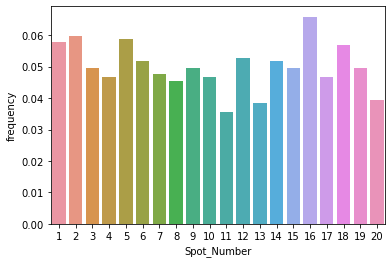

In [42]:
sns.barplot(x=df_08_17_aggregated.Spot_Number, y=df_08_17_aggregated.frequency)

## 08/15 Question

What is Bayes’ Theorem? How is it useful in a machine learning context?

Bayes' Theroem is a method used to determine the conditional probability that an event will occur. For example, determining the probability that someone will live to be 80 years old given that they are alreadu 70 years old. Having additional conditions in such a scenario can lead to more accurate results/predictions.

In machine learning there is an algorithm called the Naive Bayes Classifier, a simplified version of the Bayes Theorem. It is used as a classification algorithm. The Naive Bayes method involves considering each class value in a dataset to be independent of one another. This allows for us to compute the desired conditional probability in a simpler, more efficient manner. This yields more efficient predictions and less computing power required when training and using machine learning models  

## 08/12 Question

Given the following Python function, write out what the output would be at each stage:


    
    
n = 1
    

while n < 3:
    

    m = n + 1
    

    while m < 4:
    

        m += 1
    

        print('output:')
    

        print(m)
    

    n+= 1

### Solution

Output list:
- output: 3 ; when entering the nested while loop for the first time, n=1 so m=2. before printing, m increments 1 for a value of 3
- output: 4 ; after the above, m is still less than 4 so the nested while loop runs again. m increments by 1 to 4 so the next output value is 4 
- output: 4 ; now that m isn't less than 4, we exit the nested loop. n increments by 1 to a value of 2 and thus m is equal to 3. entering the nested loop, m increments once more to a value of 4 and this is output.

Now we exit the nested loop and increment n again to a value of 3, which breaks out of the outer loop condition n<3 and thus we are done with this function / output sequence

## 8/10 Question

You are given the below tables, showing Store, Product, and Sales information for a chain of grocery stores. The columns are labeled in such a way that you should be able to interpret what each field is showing.
    
Store


|store_id	|location|
|---|---|
|91110|	New York|
|99525|	Los Angeles|
|37340|	Tokyo|
|32016|	Detroit|
|57507|	London|

Product

|product_id|	product_name	|price_usd|
|---|---|---|
|31331|	Apples|	2|
|34611|	Lettuce	|3|
|49760|	Chicken|	5|
|26583|	Lemons|	1|
|20267|	Bread	|2|
    
Sales

|sale_id|	product_id|	store_id	|date|
|---|---|---|---|
|1|	31331|	91110|	02/20/2020|
|1|	31331|	91110|	02/20/2020|
|2|	34611|	57507|	02/20/2020|
|3|	26583|	37340|	02/20/2020|
|3|	34611|	32016|	02/20/2020|
|3|	20267|	99525|	02/21/2020|
|4|	31331|	99525|	02/21/2020|
|5|	49760|	99525|	02/21/2020|
|6|	34611|	57507|	02/21/2020|
|7|	31331|	91110|	02/21/2020|

    

    
Using the tables above, write a SQL query to return the number of sales as well as the average sale price (in dollars) for a given location.


    
Your output should return the following columns:


    
|location|	number_sales	|avg_sale_price|
|---|---|---|
|X	|Y	|Z|
|A	|B	|C|

### Approach

To solve this problem I will write a query to do as follows:
- write a subquery, which groups the data by sale id and store id and summing the order total for this grouping. This will yield a table showing the total for each sale at each store
- write an outer query, grouping the data by location. I will add columns to count the number of sales and the average amount of each sale

### Solution

select location, count(sale_id) as number_sales,avg(sale_price) as avg_sale_price <br>
from(<br>
select location,sale_id, sum(price_usd) as sale_price<br>
from store<br>
join sales<br>
on Store.store_id = Sales.store_id<br>
join product<br>
on Sales.product_id = Product.product_id<br>
group by sale_id,sales.store_id)<br>
group by location<br>

## 8/8 Question

Below is a snippet from a table that contains information about employees that work at Company XYZ:
    

    

|employee_name|	employee_id|	date_joined|	age|	yrs_of_experience|
|---|---|---|---|---|
|Andy|	123456|	2015-02-15|	45|	24|
|Beth|	789456|	NaN|	36|	15|
|Cindy|	654123|	2017-05-16|	34|	14|
|Dale|	963852|	2018-01-15|	25|	4|

    
    

    
Company XYZ recently migrated database systems causing some of the date_joined records to be NULL. You're told by an analyst in human resources NULL records for the date_joined field indicates the employees joined prior to 2010. You also find out there are multiple employees with the same name and duplicate records for some employees.

   
    
    
Given this, write code to find the number of employees that joined each month. You can group all of the null values as Dec 1, 2009.

### Explanation

To solve this problem I will:
- import the data into a dataframe to illustrate this code on the provided data
- remove rows where there are duplicate employee_id numbers (assuming that duplicates, as stated in the above, will have duplicate id values)
- remove nulls from the date field
- create new columns for month joined and years joined for a given employee
- group the data by year and month joined, and count the number of instances of each combination

### Solution

In [2]:
import pandas as pd
import numpy as np

In [31]:
data = {'employee_name': ["Andy","Beth","Cindy","Dale"], 'employee_id': [123456,789456,654123,963852],"date_joined":["02-05-2015","","05-16-2017","01-15-2018"],"age":[45,36,34,25], "yrs_of_experience":[24,15,14,4]}
august_eight_df = pd.DataFrame.from_dict(data)
august_eight_df.drop_duplicates(subset=['employee_id'])
august_eight_df['date_joined']=pd.to_datetime(august_eight_df['date_joined']).replace(np.nan,"12-01-2009")
august_eight_df['month_joined']=pd.DatetimeIndex(august_eight_df['date_joined']).month
august_eight_df['year_joined']=pd.DatetimeIndex(august_eight_df['date_joined']).year
august_eight_df

,employee_name,employee_id,date_joined,age,yrs_of_experience,month_joined,year_joined
0,Andy,123456,2015-02-05,45,24,2,2015
1,Beth,789456,2009-12-01,36,15,12,2009
2,Cindy,654123,2017-05-16,34,14,5,2017
3,Dale,963852,2018-01-15,25,4,1,2018


In [34]:
august_eight_df.groupby(['month_joined', 'year_joined']).size().reset_index(name='Number of Employees Joined')

,month_joined,year_joined,Number of Employees Joined
0,1,2018,1
1,2,2015,1
2,5,2017,1
3,12,2009,1


## 08/06 Question

Suppose you're analyzing a population of 100,000 people, and you're trying to understand life expectancy. Within this population of 100,000 people, 65% can expect to live to the age of 70, while 25% can expect to live to age 80. Given that a person is already 70, what is the probability that they live to the age 80? 

### Approach

To solve this problem, I will use conditional probability with the given information. The basic formula is: P(A|B) = P(B|A)*P(B) / P(A)

P(live to 80 | already 70) = P(live to 70 | already 80) \* P(live to 80) / P(live to 70)
P(live to 80 | already 70) = 1\*0.25/0.65 = .3846


## 08/03 Question

Write a function that can take in a text file and return the number of characters in the file categorized by:

- alphabetic
- numeric
- other non space characters

The input to the function will be a text file (you can assume we scane the whole file).

### Approach

To solve this problem, I will loop through each character in the string. For each type of character, I will initiate a counter and add to the counter if the character matches the right type.

### Solution

In [43]:
def char_counts(txt):
    alpha_counter, num_counter,other_counter = 0,0,0
    for char in txt:
        if char.isalpha():
            alpha_counter+=1
        elif char.isnumeric():
            num_counter+=1
        elif not char.isspace():
            other_counter+=1
    return alpha_counter,num_counter,other_counter

In [51]:
char_counts("h1 e")

(2, 1, 0)

## 08/01 Question TODO

Suppose you're working with a large conglomerate and are trying to aggregate revenue across all divisions to highlight the overall trend. The table you're querying off of is called allRevenue, sample schema is shown below.


    

    
Table: allRevenue


    
|date|	revenue	|division|
|---|---|---|
|2018-01-20|	15000000|	chemicals|
|2019-02-21|	120000|	agriculture|
|2019-04-09|	390900|	pharma|

    

    
Given the above, can you write a SQL query that calculates 4-quarter rolling average revenue, cut by each quarter? The output query should only have 2 columns: 'quarter' and 'revenue' (where revenue is the trailing 4-quarter average). You can assume you have access to a function similar to this.